## Using Dataset from Zillow.com to derieve multiple (3) inferences 

Source of DataSet: https://www.zillow.com/research/data/

## Project tries to accomplish 3 tasks:

## --- Part 1 : Trend of home prices in the 10 most populous US counties
## --- Part 2 : Trend of average Home Price in each US State
## --- Part 3 : Variance of home prices by State in the defined timeframe


In [1]:
import pandas as pd

path = r'.\County_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon.csv'
data = pd.read_csv(path)

In [2]:
# -----------------------------------------------------------------
# (Part 1) Trend of home prices in the 10 most populous US counties
# -----------------------------------------------------------------

# ---- Extracting a subset of 'data' dataframe, to include only the columns that are needed
# ---- Picking up the top 10 counties

df1 = data.iloc[0:10,:]


In [3]:
df1.iloc[:5,:10] # Limiting data display as there is issue in PDF generation

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,1/31/1996
0,3101,0,Los Angeles County,County,CA,CA,Los Angeles-Long Beach-Anaheim,6,37,182949.0
1,139,1,Cook County,County,IL,IL,Chicago-Naperville-Elgin,17,31,152485.0
2,1090,2,Harris County,County,TX,TX,Houston-The Woodlands-Sugar Land,48,201,102507.0
3,2402,3,Maricopa County,County,AZ,AZ,Phoenix-Mesa-Scottsdale,4,13,120104.0
4,2841,4,San Diego County,County,CA,CA,San Diego-Carlsbad,6,73,194757.0


In [4]:
# Creating a sub-dataframe to have only RegionName and HomePrices data

df2 = df1[['RegionName'] + [c for c in df1.columns[9:302]]]

df2 = df2.set_index('RegionName')
df2.iloc[:5,:10] # Limiting data display as there is issue in PDF generation


,1/31/1996,2/29/1996,3/31/1996,4/30/1996,5/31/1996,6/30/1996,7/31/1996,8/31/1996,9/30/1996,10/31/1996
RegionName,,,,,,,,,,
Los Angeles County,182949.0,182997.0,183087.0,183270.0,183443.0,183655.0,183922.0,183939.0,183799.0,183519.0
Cook County,152485.0,152258.0,151906.0,151775.0,151339.0,151393.0,151161.0,151461.0,151913.0,152604.0
Harris County,102507.0,102579.0,102590.0,102735.0,102887.0,102984.0,103024.0,103083.0,103254.0,103448.0
Maricopa County,120104.0,120440.0,120821.0,121557.0,122272.0,122917.0,123517.0,124062.0,124603.0,125122.0
San Diego County,194757.0,194420.0,194239.0,193856.0,193686.0,193558.0,193412.0,193182.0,192969.0,192971.0


In [5]:
# Transposing the dataframe for ease of plotting

df2_T = df2.transpose()

# print(type(df1))
# print(help(df2_T))
df2_T.head()

RegionName,Los Angeles County,Cook County,Harris County,Maricopa County,San Diego County,Orange County,Kings County,Miami-Dade County,Dallas County,Queens County
1/31/1996,182949.0,152485.0,102507.0,120104.0,194757.0,225029.0,216945.0,123057.0,97537.0,223640.0
2/29/1996,182997.0,152258.0,102579.0,120440.0,194420.0,225949.0,216279.0,123212.0,97597.0,223182.0
3/31/1996,183087.0,151906.0,102590.0,120821.0,194239.0,225839.0,215855.0,123384.0,97801.0,223070.0
4/30/1996,183270.0,151775.0,102735.0,121557.0,193856.0,225890.0,215135.0,123711.0,98127.0,222702.0
5/31/1996,183443.0,151339.0,102887.0,122272.0,193686.0,225456.0,214812.0,124023.0,98475.0,222659.0


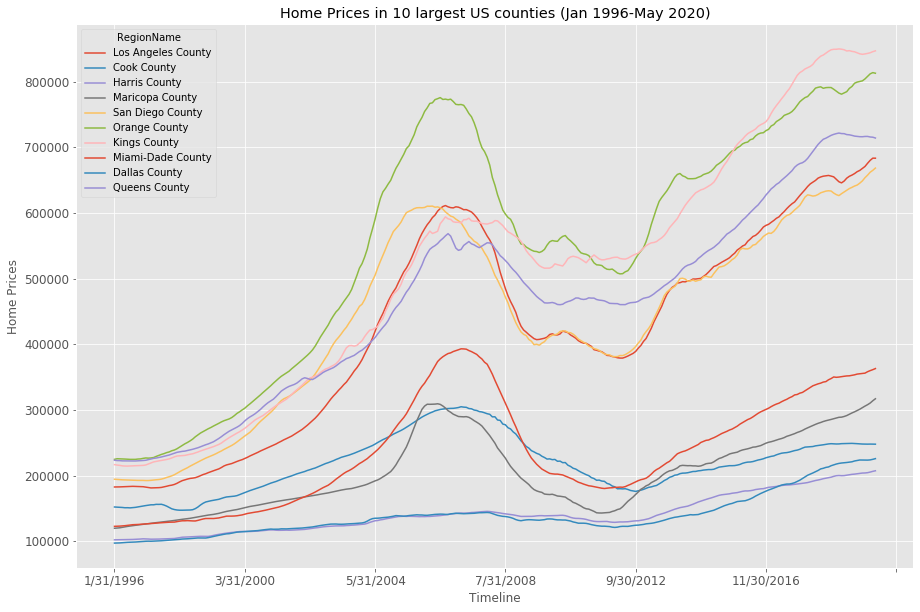

In [6]:
# Visualization

import matplotlib.pyplot as plt
import seaborn as sn

plt.style.use('ggplot')

ax = df2_T.plot(kind='line', title='Home Prices in 10 largest US counties (Jan 1996-May 2020)',figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Timeline", fontsize=12)
ax.set_ylabel("Home Prices", fontsize=12)
plt.show()



## Analysis of Trend of home prices in the 10 most populous US counties
- Orange County (CA) has lead the way for most part, with Kings County (NY) overtaking it recently
- Dallas and Queens Counties did not see much appreciation before 2008 real estate crash. They are rising now.


In [7]:
# -----------------------------------------------------------------
# (Part 2) - Trend of average Home Price in each State
# -----------------------------------------------------------------

# reviewing our main data set

data.iloc[:5,:10]


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,1/31/1996
0,3101,0,Los Angeles County,County,CA,CA,Los Angeles-Long Beach-Anaheim,6,37,182949.0
1,139,1,Cook County,County,IL,IL,Chicago-Naperville-Elgin,17,31,152485.0
2,1090,2,Harris County,County,TX,TX,Houston-The Woodlands-Sugar Land,48,201,102507.0
3,2402,3,Maricopa County,County,AZ,AZ,Phoenix-Mesa-Scottsdale,4,13,120104.0
4,2841,4,San Diego County,County,CA,CA,San Diego-Carlsbad,6,73,194757.0


In [8]:
# Removing unwanted columns from the dataframe
df2 = data
for col in df2.columns[:5]:
    df2.pop(col)
    print(col)

df2

RegionID
SizeRank
RegionName
RegionType
StateName


,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,1/31/1996,2/29/1996,3/31/1996,4/30/1996,5/31/1996,6/30/1996,...,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020
0,CA,Los Angeles-Long Beach-Anaheim,6,37,182949.0,182997.0,183087.0,183270.0,183443.0,183655.0,...,657749,660055,662930,664855,667940,670891,675744,680200,683519,683457
1,IL,Chicago-Naperville-Elgin,17,31,152485.0,152258.0,151906.0,151775.0,151339.0,151393.0,...,249332,249155,248868,248580,248321,248194,248167,248263,248182,248110
2,TX,Houston-The Woodlands-Sugar Land,48,201,102507.0,102579.0,102590.0,102735.0,102887.0,102984.0,...,202199,202542,203110,203609,204154,204286,204730,205652,206756,207617
3,AZ,Phoenix-Mesa-Scottsdale,4,13,120104.0,120440.0,120821.0,121557.0,122272.0,122917.0,...,295658,297357,299267,301334,303718,306083,308232,310773,314236,317242
4,CA,San Diego-Carlsbad,6,73,194757.0,194420.0,194239.0,193856.0,193686.0,193558.0,...,639063,641095,642581,645461,648917,653769,657668,662133,664979,668416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,ID,Hailey,16,25,NaN,NaN,NaN,NaN,NaN,NaN,...,114318,114981,115424,116308,117195,118132,118651,118885,119168,119699
2844,UT,NaN,49,9,NaN,NaN,NaN,NaN,NaN,NaN,...,212414,212975,213362,213937,213927,213933,213862,214275,214516,214779
2845,CO,NaN,8,53,NaN,NaN,NaN,NaN,NaN,NaN,...,317824,318004,319366,320176,320624,321060,321561,322045,320889,320520
2846,CO,NaN,8,79,NaN,NaN,NaN,NaN,NaN,NaN,...,280400,281412,281285,280944,280371,280372,280481,280687,280462,280372


In [9]:
df2 = data.groupby(['State']).mean()
df3 = df2.dropna()
df3

,StateCodeFIPS,MunicipalCodeFIPS,1/31/1996,2/29/1996,3/31/1996,4/30/1996,5/31/1996,6/30/1996,7/31/1996,8/31/1996,...,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020
State,,,,,,,,,,,,,,,,,,,,,
AK,2.0,155.615385,142278.000000,142837.000000,143328.000000,144349.000000,145091.000000,145778.000000,146317.000000,146741.000000,...,300045.307692,301014.538462,301992.076923,302748.461538,303652.230769,304538.153846,305111.538462,305495.846154,305301.615385,305372.692308
AL,1.0,67.092308,87076.714286,87225.000000,87374.000000,87613.571429,81715.333333,81939.888889,82221.333333,85374.700000,...,110754.123077,111122.938462,111531.261538,111957.615385,112381.030769,112810.400000,113251.153846,113690.092308,114122.507692,114578.538462
AR,5.0,75.297297,57762.069767,57747.720930,57783.813953,57847.093023,57948.860465,58037.976744,58132.627907,58250.581395,...,92201.162162,92508.851351,92853.567568,93099.027027,93300.040541,93423.175676,93650.000000,93851.378378,94082.540541,94195.932432
AZ,4.0,13.866667,96006.000000,94165.454545,94457.272727,94986.545455,95574.909091,96089.636364,96527.909091,96937.454545,...,217569.800000,218547.266667,219530.800000,220396.000000,221469.866667,222596.600000,223859.800000,225211.200000,226662.200000,227998.866667
CA,6.0,58.000000,189347.392857,188785.500000,188481.607143,187856.178571,187510.535714,187261.678571,187101.571429,187186.750000,...,478842.448276,479728.896552,480661.982759,481584.413793,482770.310345,484144.120690,485566.948276,486813.034483,487198.068966,486713.672414
CO,8.0,62.234375,141395.615385,141797.461538,142183.000000,142997.923077,143797.307692,144566.384615,145277.884615,145981.500000,...,352391.437500,353188.578125,353983.609375,354207.640625,354380.484375,354680.250000,355319.453125,356020.531250,356659.687500,357410.656250
CT,9.0,8.000000,165006.142857,164627.428571,164710.857143,164674.285714,164818.714286,164913.000000,164942.285714,164952.428571,...,280575.000000,280762.875000,280987.000000,281192.750000,281468.750000,282082.125000,282522.000000,282835.500000,282932.625000,283031.500000
DC,11.0,1.000000,194853.000000,193853.000000,192993.000000,191555.000000,190442.000000,189632.000000,188926.000000,188288.000000,...,736774.000000,738401.000000,739859.000000,740228.000000,741028.000000,742314.000000,743434.000000,743254.000000,743598.000000,739995.000000
DE,10.0,3.000000,127462.000000,127365.000000,127295.500000,127161.000000,127259.000000,127457.000000,127727.500000,128089.000000,...,265023.000000,265261.666667,265385.666667,265431.000000,265659.666667,266094.666667,266976.000000,267782.000000,268880.333333,270496.333333


In [10]:
# refining the dataframe further by removing unwanted columns
if 'StateCodeFIPS' in df3.columns:
    df3.pop('StateCodeFIPS')
if 'MunicipalCodeFIPS' in df3.columns:
    df3.pop('MunicipalCodeFIPS')
df3

,1/31/1996,2/29/1996,3/31/1996,4/30/1996,5/31/1996,6/30/1996,7/31/1996,8/31/1996,9/30/1996,10/31/1996,...,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020
State,,,,,,,,,,,,,,,,,,,,,
AK,142278.000000,142837.000000,143328.000000,144349.000000,145091.000000,145778.000000,146317.000000,146741.000000,147008.000000,147048.000000,...,300045.307692,301014.538462,301992.076923,302748.461538,303652.230769,304538.153846,305111.538462,305495.846154,305301.615385,305372.692308
AL,87076.714286,87225.000000,87374.000000,87613.571429,81715.333333,81939.888889,82221.333333,85374.700000,85570.400000,85760.300000,...,110754.123077,111122.938462,111531.261538,111957.615385,112381.030769,112810.400000,113251.153846,113690.092308,114122.507692,114578.538462
AR,57762.069767,57747.720930,57783.813953,57847.093023,57948.860465,58037.976744,58132.627907,58250.581395,58379.023256,58527.930233,...,92201.162162,92508.851351,92853.567568,93099.027027,93300.040541,93423.175676,93650.000000,93851.378378,94082.540541,94195.932432
AZ,96006.000000,94165.454545,94457.272727,94986.545455,95574.909091,96089.636364,96527.909091,96937.454545,97331.181818,97790.545455,...,217569.800000,218547.266667,219530.800000,220396.000000,221469.866667,222596.600000,223859.800000,225211.200000,226662.200000,227998.866667
CA,189347.392857,188785.500000,188481.607143,187856.178571,187510.535714,187261.678571,187101.571429,187186.750000,187392.178571,187860.571429,...,478842.448276,479728.896552,480661.982759,481584.413793,482770.310345,484144.120690,485566.948276,486813.034483,487198.068966,486713.672414
CO,141395.615385,141797.461538,142183.000000,142997.923077,143797.307692,144566.384615,145277.884615,145981.500000,146699.461538,147368.115385,...,352391.437500,353188.578125,353983.609375,354207.640625,354380.484375,354680.250000,355319.453125,356020.531250,356659.687500,357410.656250
CT,165006.142857,164627.428571,164710.857143,164674.285714,164818.714286,164913.000000,164942.285714,164952.428571,164688.285714,164471.428571,...,280575.000000,280762.875000,280987.000000,281192.750000,281468.750000,282082.125000,282522.000000,282835.500000,282932.625000,283031.500000
DC,194853.000000,193853.000000,192993.000000,191555.000000,190442.000000,189632.000000,188926.000000,188288.000000,187903.000000,187354.000000,...,736774.000000,738401.000000,739859.000000,740228.000000,741028.000000,742314.000000,743434.000000,743254.000000,743598.000000,739995.000000
DE,127462.000000,127365.000000,127295.500000,127161.000000,127259.000000,127457.000000,127727.500000,128089.000000,128407.000000,128699.000000,...,265023.000000,265261.666667,265385.666667,265431.000000,265659.666667,266094.666667,266976.000000,267782.000000,268880.333333,270496.333333


In [11]:
# Creating a new dataframe with data for five highest and five lowest priced average home prices 
df3_sorted = df3.sort_values(by=['5/31/2020'])

df3_sorted_lowest = df3_sorted.iloc[:5, : ]

df3_sorted_highest = df3_sorted.iloc[-5:, : ]

df3_sorted_highest
print('\n------\n')
df3_sorted_lowest


------



,1/31/1996,2/29/1996,3/31/1996,4/30/1996,5/31/1996,6/30/1996,7/31/1996,8/31/1996,9/30/1996,10/31/1996,...,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020
State,,,,,,,,,,,,,,,,,,,,,
AR,57762.069767,57747.720930,57783.813953,57847.093023,57948.860465,58037.976744,58132.627907,58250.581395,58379.023256,58527.930233,...,92201.162162,92508.851351,92853.567568,93099.027027,93300.040541,93423.175676,93650.000000,93851.378378,94082.540541,94195.932432
OK,48394.482143,48453.214286,48529.017857,48679.017857,48811.803571,48936.000000,49059.857143,49181.696429,49283.678571,49360.410714,...,93525.136986,93890.808219,94208.219178,94696.780822,95276.246575,95912.506849,96269.164384,96518.479452,96729.068493,96920.465753
WV,57032.500000,57059.571429,57065.500000,57124.000000,57169.928571,57242.428571,57288.642857,57324.714286,57350.642857,57357.571429,...,96283.981481,96589.370370,96827.351852,96860.111111,96853.388889,96864.462963,96933.185185,96970.333333,97006.518519,97112.351852
KY,66018.450980,66164.254902,66290.156863,66579.470588,66828.176471,67063.431373,67267.470588,67483.823529,67714.549020,67927.862745,...,110859.552632,111327.921053,111800.026316,112180.421053,112551.982456,112777.377193,112893.622807,112924.885965,112911.052632,112805.429825
KS,78375.000000,78440.000000,78510.000000,78653.000000,78770.000000,78912.000000,79061.000000,79185.000000,79245.000000,79295.000000,...,111758.859375,112104.718750,112353.859375,112507.156250,112709.250000,112890.171875,113098.734375,113264.281250,113441.125000,113629.140625


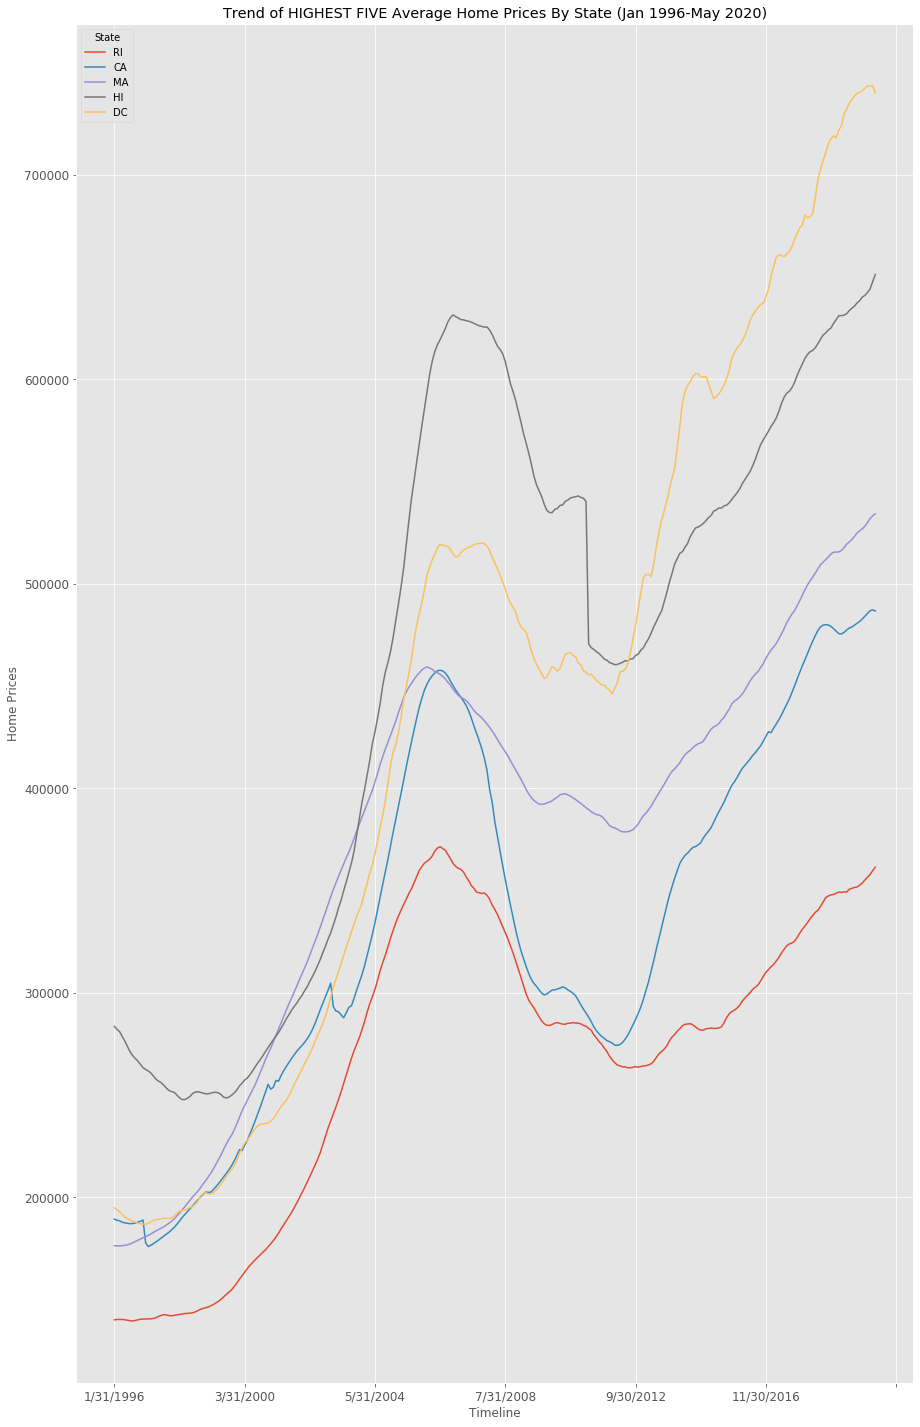

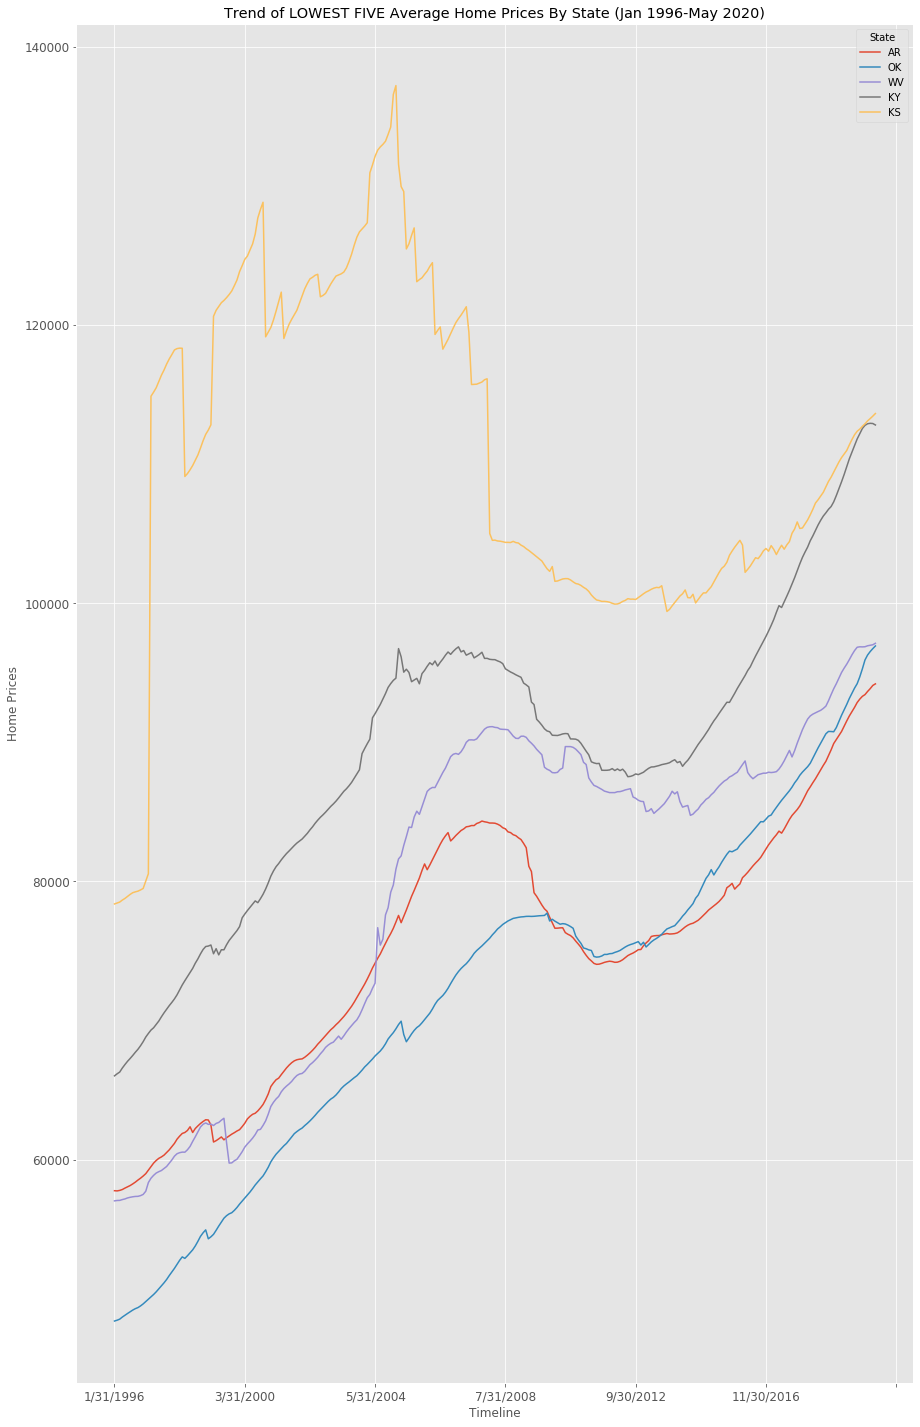

In [12]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sn


plt.style.use('ggplot')

ax1 = df3_sorted_highest.T.plot(kind='line', title='Trend of HIGHEST FIVE Average Home Prices By State (Jan 1996-May 2020)',figsize=(15, 25), legend=True, fontsize=12)
ax2 = df3_sorted_lowest.T.plot(kind='line', title='Trend of LOWEST FIVE Average Home Prices By State (Jan 1996-May 2020)',figsize=(15, 25), legend=True, fontsize=12)

ax1.set_xlabel("Timeline", fontsize=12)
ax1.set_ylabel("Home Prices", fontsize=12)

ax2.set_xlabel("Timeline", fontsize=12)
ax2.set_ylabel("Home Prices", fontsize=12)
plt.show()

## Analysis of trends for states with Highest home prices:
 - Home Prices in Rhode Island and Hawaii have just reached (as of May 2020) the 2008 levels. While for other states breached that mark about 4 years ago
 - DC is clearly an outlier in home price growth, even out-pacing CA.
 
## Analysis of trends for states with Lowest home prices:
 - Kansas seems to have the wildest fluctuations in home prices
 - Other states are conforming to the general trend.


In [13]:
#-------------------------------------------------------
# Part 3 : Variance of home prices by State in the defined timeframe
#-------------------------------------------------------

df4 = df3.copy()
df4['Variance'] = df4.var(axis=1, skipna=True)
# df4 = df4.sort_values(by=['Variance'])
df4['Variance']



State
AK    2.396959e+09
AL    7.942045e+07
AR    8.684626e+07
AZ    1.520877e+09
CA    8.729289e+09
CO    2.611202e+09
CT    2.779794e+09
DC    2.931969e+10
DE    2.766807e+09
FL    1.561461e+09
GA    3.036946e+08
HI    1.940065e+10
IA    1.977314e+08
ID    1.113688e+09
IL    1.328523e+08
IN    2.062608e+08
KS    1.502356e+08
KY    1.153453e+08
LA    2.221977e+08
MA    1.011650e+10
MD    3.230291e+09
ME    1.028046e+09
MI    2.929031e+08
MN    4.691635e+08
MO    1.436909e+08
NC    4.500792e+08
NE    1.388170e+08
NH    2.326878e+09
NJ    4.711580e+09
NV    1.973848e+09
NY    2.141381e+09
OH    1.401035e+08
OK    1.491746e+08
OR    1.649012e+09
PA    3.535356e+08
RI    5.401795e+09
SC    1.837222e+08
SD    1.748904e+09
TN    4.033683e+08
TX    1.695658e+08
UT    1.500238e+09
VA    1.125793e+09
VT    1.745767e+09
WA    2.331085e+09
WI    2.424449e+08
WV    1.571620e+08
Name: Variance, dtype: float64

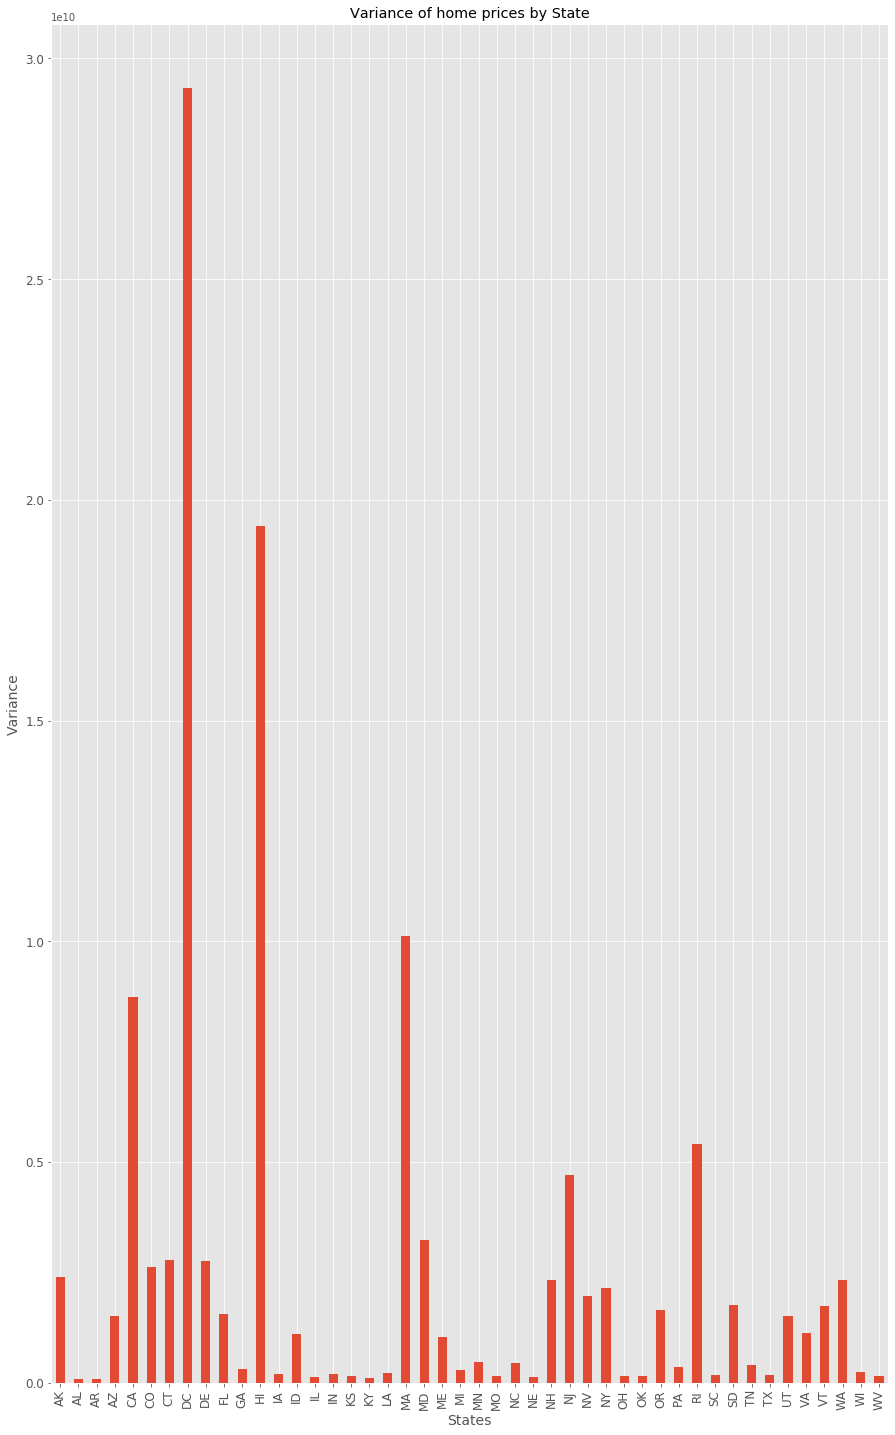

In [14]:
ax4 = df4['Variance'].plot(kind='bar', title='Variance of home prices by State',figsize=(15, 25), legend=False, fontsize=12)
ax4.set_xlabel("States", fontsize=14)
ax4.set_ylabel("Variance", fontsize=14)
plt.show()

## Analysis of Variance of home prices
 - Property valuations have risen the sharpest in DC
 - Surprisingly, New York's variance has been average